# Part 1: Data

### Importing Libraries

In [ ]:
import pandas

### Data Loading

In [ ]:
# if the fil is on Colab
dataset = pandas.read_csv('pokedex.csv')

In [ ]:
# if the file is online somewhere as a csv
dataset = pandas.read_csv('https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/pokedex_(Update_05.20).csv')

In [ ]:
#pandas.read_...
#badel les ... ib wa7da min hedhouma: csv, json, html, pickle etc...

### Exploratory Data Analysis (EDA)

In [ ]:
# fi wist dataframe, najmou na3rfou 7ajtin:
# Attribut li howa une information deja mawjouda
# Fonction ti7siblna 7aja

In [ ]:
dataset.shape #number of rows and columns

(1028, 51)

In [ ]:
dataset.columns # names of columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [ ]:
dataset.head() # first rows (5 by default)
dataset.tail() # last rows (5 by default)
dataset.sample() # random rows (1 by default)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
227,227,186,Politoed,Quaxo,ニョロトノ (Nyorotono),2,Normal,Frog Pokémon,1,Water,NaN,1.1,33.9,3,Water Absorb,Damp,Drizzle,500.0,90.0,75.0,75.0,90.0,100.0,70.0,45.0,70.0,225.0,Medium Slow,1,Water 1,NaN,50.0,20.0,1.0,0.5,0.0,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [ ]:
dataset.info() 
# many columns have missing data
# all columns are correctly typed
# memory size is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   uint8  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [ ]:
# generation has 8 unique values > 0 --> cast to unit8
dataset['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#casting generatin to uint8
dataset['generation'] = dataset['generation'].astype("uint8")

In [ ]:
dataset.describe() #possibility of outlier in height_m and weight_kg

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:
type(dataset) # DataFrame
type(dataset['height_m']) # Series
type(dataset['height_m'].values) # array

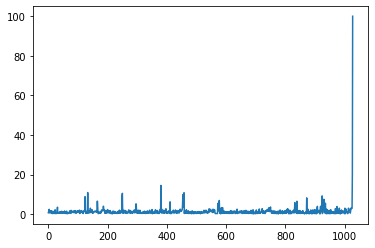

In [ ]:
dataset['height_m'].plot() 
# Outlier in height_m (100m)
# weight: no outlier

In [ ]:
# Filtering (conditional selection)
dataset[ dataset['height_m'] > 90 ]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
dataset[ dataset['species'] == "Gigantic Pokémon"]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


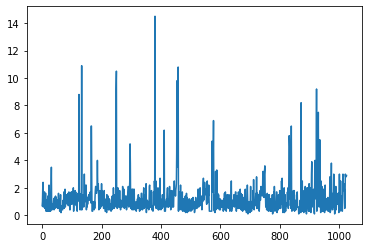

In [ ]:
dataset[ dataset['height_m'] < 20 ]['height_m'].plot()

In [ ]:
tall_legendary_pokemons = dataset[ (dataset['height_m'] > 10) & (dataset['status'] == "Legendary")]
tall_legendary_pokemons

In [ ]:
dataset.describe(include="object")

,name,german_name,japanese_name,status,species,type_1,type_2,ability_1,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2
count,1028,938,938,1028,1028,1028,542,1025,513,810,1027,1025,282
unique,1028,807,807,4,641,18,18,202,126,154,6,15,11
top,Dragalge,Rotom,ロトム (Rotom),Normal,Mouse Pokémon,Water,Flying,Levitate,Frisk,Telepathy,Medium Fast,Field,Water 1
freq,1,6,6,915,12,134,109,41,17,21,432,258,76


In [ ]:
# Getting values
dataset['status'].count()  # number of non NaN values
dataset['status'].unique()   # unique values
dataset['status'].nunique()  # number of unique values
dataset.dtypes # returns types of columns

In [ ]:
dataset.sort_values('weight_kg', ascending=False)

In [ ]:
dataset.isna().sum() # how many missing values we have per column
dataset.isnull().sum() #same thing
# if we add another .sum() we have number of total missing values

In [ ]:
dataset[ dataset.isnull().any(axis=1) ] # rows li fehom at least 1 missing value
dataset[ dataset.isnull().all(axis=1) ] # rows li columns kol te3ha null

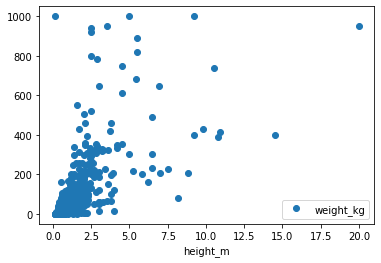

In [ ]:
dataset.plot(x="height_m", y="weight_kg", style="o")

## Data Preprocessing / cleaning

In [ ]:
# colonnes ( Unnamed, german_name, japanese_name, pokedex_number) najmou nistghanew minhom
dataset.drop(["Unnamed: 0",'japanese_name','pokedex_number','german_name'], axis=1, inplace=True)

In [ ]:
dataset.drop([2,5], axis=0, inplace=True) # drops rows with indices 2 & 5

In [ ]:
dataset.rename(columns = {'generation ':'gen'}, inplace=True)

In [ ]:
dataset['bmi'] = dataset['weight_kg'] / dataset['height_m']
dataset['bmi'] = 0
# if bmi column exists, the values will be replaced
# else the column will be created and assigned the right side

In [ ]:
dataset.to_csv("new.csv", index=False)

In [ ]:
# to change order of columns do the following with the dolumns ordered like you want
# to get the list of columns use dataset.columns
dataset = dataset[['gen', 'status','name', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy', 'bmi']]

# Part 2: ML

#### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data Loading

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/dataset_malwares.csv')

#### EDA

In [ ]:
dataset.shape

(19611, 79)

In [ ]:
dataset.sample(5) 

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
5142,VirusShare_efe14d47c7d47b26b5fbbfeb27cf5037,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,176,332,3,1333570257,0,0,224,271,267,6,0,81920,20480,0,4472,4096,4194304,4096,4096,4,0,1,0,4,0,4096,133625,106496,2,0,1048576,4096,1048576,4096,0,16,1,0,0,3,0.000000,0,0,0,3964,0,78816,0,90112,0,86016,0,3221225536,0,1,36,0,0,82564,90112,0,0
4340,VirusShare_8d529bfa7ace65ff6087f9713fd6fbc9,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,5,1387178212,0,0,224,8450,267,8,0,237568,159744,0,214600,4096,1667235840,4096,4096,4,0,0,0,4,0,4096,435202,405504,2,256,1048576,4096,1048576,4096,0,16,1,0,0,5,3.860059,0,4096,0,1496,0,235983,0,372736,0,368640,0,3221225536,0,14,352,5,352048,338788,368640,0,401408
18638,JavaAccessBridge-32.dll,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,232,332,5,1504667863,0,0,224,8450,267,10,0,52224,69120,0,54819,4096,1839595520,4096,512,5,1,0,0,5,1,1024,186400,135168,2,320,1048576,4096,1048576,4096,0,16,0,0,0,5,0.278747,0,512,0,896,0,61718,0,131072,0,117760,0,3221225536,0,3,59,28,116848,115420,126976,0,121856
14384,VirusShare_e9782a5dfb3076c09043a4656a159c29,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,216,332,5,1260053521,0,0,224,271,267,6,0,23040,265728,8192,12491,4096,4194304,4096,512,4,0,6,0,4,0,1024,0,2822144,2,32768,1048576,4096,1048576,4096,0,16,1,0,0,5,0.000000,0,0,0,4496,0,2498560,0,2789376,0,29696,0,3221225600,0,8,155,0,0,29604,2789376,0,0
15246,scecli.dll,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,5,1377139696,0,0,224,8450,267,11,0,183808,25600,0,4320,4096,1607467008,4096,512,6,3,6,3,6,3,1024,213825,221184,3,320,262144,4096,1048576,4096,0,16,0,9,0,5,2.843098,0,1536,0,1352,0,183415,0,208896,0,196608,0,3221225536,0,25,184,72,4732,197444,204800,0,0


In [ ]:
# bch nfasakh Name khater lesemi dima titbadel w easy bch tghaltou in the future
# inajem il model ya3mel overfitting 3al name de facon kol ma ira Virus Share i9olik malware
# iwali meme pas irakez m3al be9i, just irakiz m3al name
dataset.drop('Name',axis=1, inplace=True)

In [ ]:
# isna().sum() gives number of missing values per column
# isna().sum().sum() gives total number of missing values in the dataset
dataset.isna().sum().sum() 
#no missing values, parfait

0

In [ ]:
dataset.info()
# no mistypes, no need to cast types
# no objects (strings), no need for categorical encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   e_magic                       19611 non-null  int64  
 1   e_cblp                        19611 non-null  int64  
 2   e_cp                          19611 non-null  int64  
 3   e_crlc                        19611 non-null  int64  
 4   e_cparhdr                     19611 non-null  int64  
 5   e_minalloc                    19611 non-null  int64  
 6   e_maxalloc                    19611 non-null  int64  
 7   e_ss                          19611 non-null  int64  
 8   e_sp                          19611 non-null  int64  
 9   e_csum                        19611 non-null  int64  
 10  e_ip                          19611 non-null  int64  
 11  e_cs                          19611 non-null  int64  
 12  e_lfarlc                      19611 non-null  int64  
 13  e

In [ ]:
dataset['Malware'].value_counts()
# 1/4 of the data is not malware --> Class Imbalance

1    14599
0     5012
Name: Malware, dtype: int64

(array([ 5012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14599.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

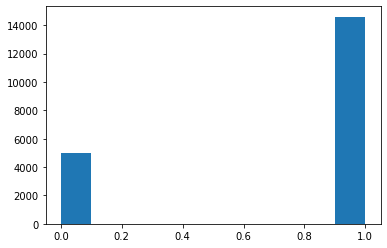

In [ ]:
plt.hist(dataset['Malware'])
# Big class imabalance (1/4) wa laken  fi cas ta3 antivirus we want the model to be stronk
# on the Malware (1) donc nkhaliwha for now haka

In [ ]:
dataset.describe()
# we can remove and encode many features (ex: e_magic)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.00000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,107.662434,63.839937,155.523839,92.185610,354.104992,363.403957,220.336750,4852.718678,5.030544,1.283909e+09,6.873241e+06,7.111700e+06,226.173066,5551.12595,300.966243,8.762582,5.119423,1.523875e+06,1.898218e+06,2.687883e+05,8.037910e+06,9.708936e+05,3.106922e+10,4346.067819,874.013972,23.485085,18.022283,52.873744,44.736831,4.769925,14.103921,1.699066e+03,1.154911e+08,1.615545e+06,2.172097,18160.210647,1.074053e+06,7.590221e+03,1.057768e+06,2.376824e+04,1.489712e+06,1.553571e+05,0.744429,5.142675,0.018153,5.030340,1.547795,0.0,2.459628e+04,0.0,2.748368e+04,0.0,7.641715e+05,0.0,9.101676e+05,0.0,2.327726e+07,0.0,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,1826.995907,1142.682852,1717.331368,1644.797529,3819.329588,4069.272854,70.195798,11558.504580,2.084433,2.945803e+08,1.344465e+08,1.208990e+08,5.986218,9502.47239,86.844903,9.701518,17.762468,5.162412e+07,6.055686e+07,3.068554e+07,1.085113e+08,5.250490e+07,4.602648e+11,1103.142554,1081.272068,925.940606,812.631879,1259.221050,1063.217530,0.811817,932.235146,1.397772e+04,4.943297e+08,3.400173e+07,0.484759,16397.914722,1.377536e+06,7.600085e+04,5.931658e+05,5.731730e+05,6.259495e+07,1.471899e+07,0.436193,6.865930,0.183114,2.084558,1.810216,0.0,5.055981e+05,0.0,5.057358e+05,0.0,9.044052e+06,0.0,2.095545e+07,0.0,2.918776e+08,0.0,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### Data Preparation

In [ ]:
X = dataset.drop('Malware', axis=1)
y = dataset['Malware']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Machine Learning

In [ ]:
# Importation des modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Instantiation des modèles
#svm = SVC()
knn = KNeighborsClassifier()
log = LogisticRegression()

In [ ]:
# Train
log.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
# underfitting --> right fit --> overfitting
# If train score low (and/or test score low) --> underfitting
# If train score very higher than test score --> overfitting
# If train score and test score similar --> the right fit

# if le cas spécial where train score taya7 and test score 3ali then do many train_test_splits

In [ ]:
# Evaluation
print(log.score(X_train, y_train), log.score(X_test, y_test)) #.score calculates the accuracy of the model
# Underfitting

0.2532508924018358 0.2648483303594188


In [ ]:
svm.score(X_test, y_test)

0.7392301809839409

In [ ]:
print(  round(knn.score(X_train, y_train),4) )
print(  round(knn.score(X_test, y_test)  ,4) )
# The right fit

0.9883
0.9873


In [ ]:
# Ovefitting if train score >> test score 

In [ ]:
0 - 0 --> parfait
0 - 1 --> ghalta
1 - 0 --> ghalta
1 - 1 --> parfait

accuracy ta3tini mesure globale ta3 9adeh jib s7i7 en total
recall ta3tini mesure ta3 9adeh min 1 jibtou 0 (9adeh min malware ma chla9tich bih) <----- AHAM HAJA
precision ta3tini mesure 9adeh min 0 jibtou 1 (9adeh min prog 3adi fibeli bih virus)

In [ ]:
predictions = svm.predict(X_test)
accuracy_score(y_test,predictions)
# is the same as
svm.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions_svm = svm.predict(X_test)
predictions_knn = knn.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
prec = precision_score(y_test,predictions)
f1 = f1_score(y_test, predictions)

In [ ]:
print(acc, rec, prec, f1) 
# while recall is perfect, precision 7ala meaning that the model is giving too many 1s which is not balanced

0.7392301809839409 1.0 0.738162272843614 0.8493594463260198


In [ ]:
print(acc, rec, prec, f1)
# All values are balanced, perfect

0.987254652052001 0.9941054091539528 0.9886206896551725 0.9913554633471646


In [ ]:
from sklearn.metrics import classification_report
# all values are balanced
print(classification_report(y_test, predictions_knn))

In [ ]:
print(classification_report(y_test, predictions_svm))
# Recal for the non-malware label (0) is terrible, so discard SVM

              precision    recall  f1-score   support

           0       1.00      0.02      0.03      1039
           1       0.74      1.00      0.85      2884

    accuracy                           0.74      3923
   macro avg       0.87      0.51      0.44      3923
weighted avg       0.81      0.74      0.63      3923



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions_tree = tree.predict(X_test)
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1039
           1       0.99      0.99      0.99      2884

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



In [ ]:
tree.feature_importances_ # 9adeh les valeurs ta3 kol feature 9adeh 3awnet

In [ ]:
dataset.columns # ta3tini esemi les colonnes b nafs nidham ta3 feature_importances_

In [ ]:
sorted(list(zip(tree.feature_importances_, X.columns)), reverse=True)
# ya3mali list ta3 kol colonne chnaw importance te3ha w mnadhma min a3la wa7da li a9al wa7da

In [ ]:
features = dataset[['MajorSubsystemVersion', 'Subsystem', 'MajorLinkerVersion', 'TimeDateStamp', 'CheckSum']]
labels = dataset['Malware']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=10)

In [ ]:
log.fit(X_train, y_train)  # before kenit 0.26 accuracy w taw 74 accuracy
svm.fit(X_train, y_train) # nafsou
knn.fit(X_train, y_train) # ta7 chwaya
tree.fit(X_train, y_train) # ta7 chwaya

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1039
           1       0.99      0.99      0.99      2884

    accuracy                           0.98      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923



In [ ]:
# 76 features --> 0.99 accuracy / 0.98 f1
# 5 features  --> 0.98 accuarcy / 0.97 f1

In [ ]:
from joblib import dump

dump(tree, 'antivirus_tree.joblib')

['antivirus_tree.joblib']

#### Deployment on a web server (APP)

In [ ]:
from joblib import load

def get_data():
  # method 1: API
  # method 2: Database
  return features
  
def preprocess_data(features):
  # Missing data
  # Type casting
  # Normalisation & standardisation
  return pre_processed_data

def main():
  # Model Loading
  model = load("antivirus_tree.joblib")

  # Getting the data to predict on
  features = get_data()
  pre_processed_data = preprocess(features)

  # Inference / Predict
  return model.predict(pre_processed_data)

# Part 3: Preprocessing

*   Preprocessing
*   Regression



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/LearningPlus/MarketingRawData/master/MarketingRawData.csv")
dataset.shape

(182, 11)

In [ ]:
dataset.head()
# Label (y) --> Revenue
# Promo et Day_name strings

# Date (tricky to use) 
# --> m1: nkharej minha 3 colonnes: day
# -------> m2: nistaghna 3andha 3alakhatir deja 3andi colonnes year, month & week

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


In [ ]:
dataset.sample(10)
# Do not delete Week_ID and Month_ID 

In [ ]:
dataset.isnull().sum() 
# No missing values

In [ ]:
dataset.info()
# No type problems, all numbers are int or float

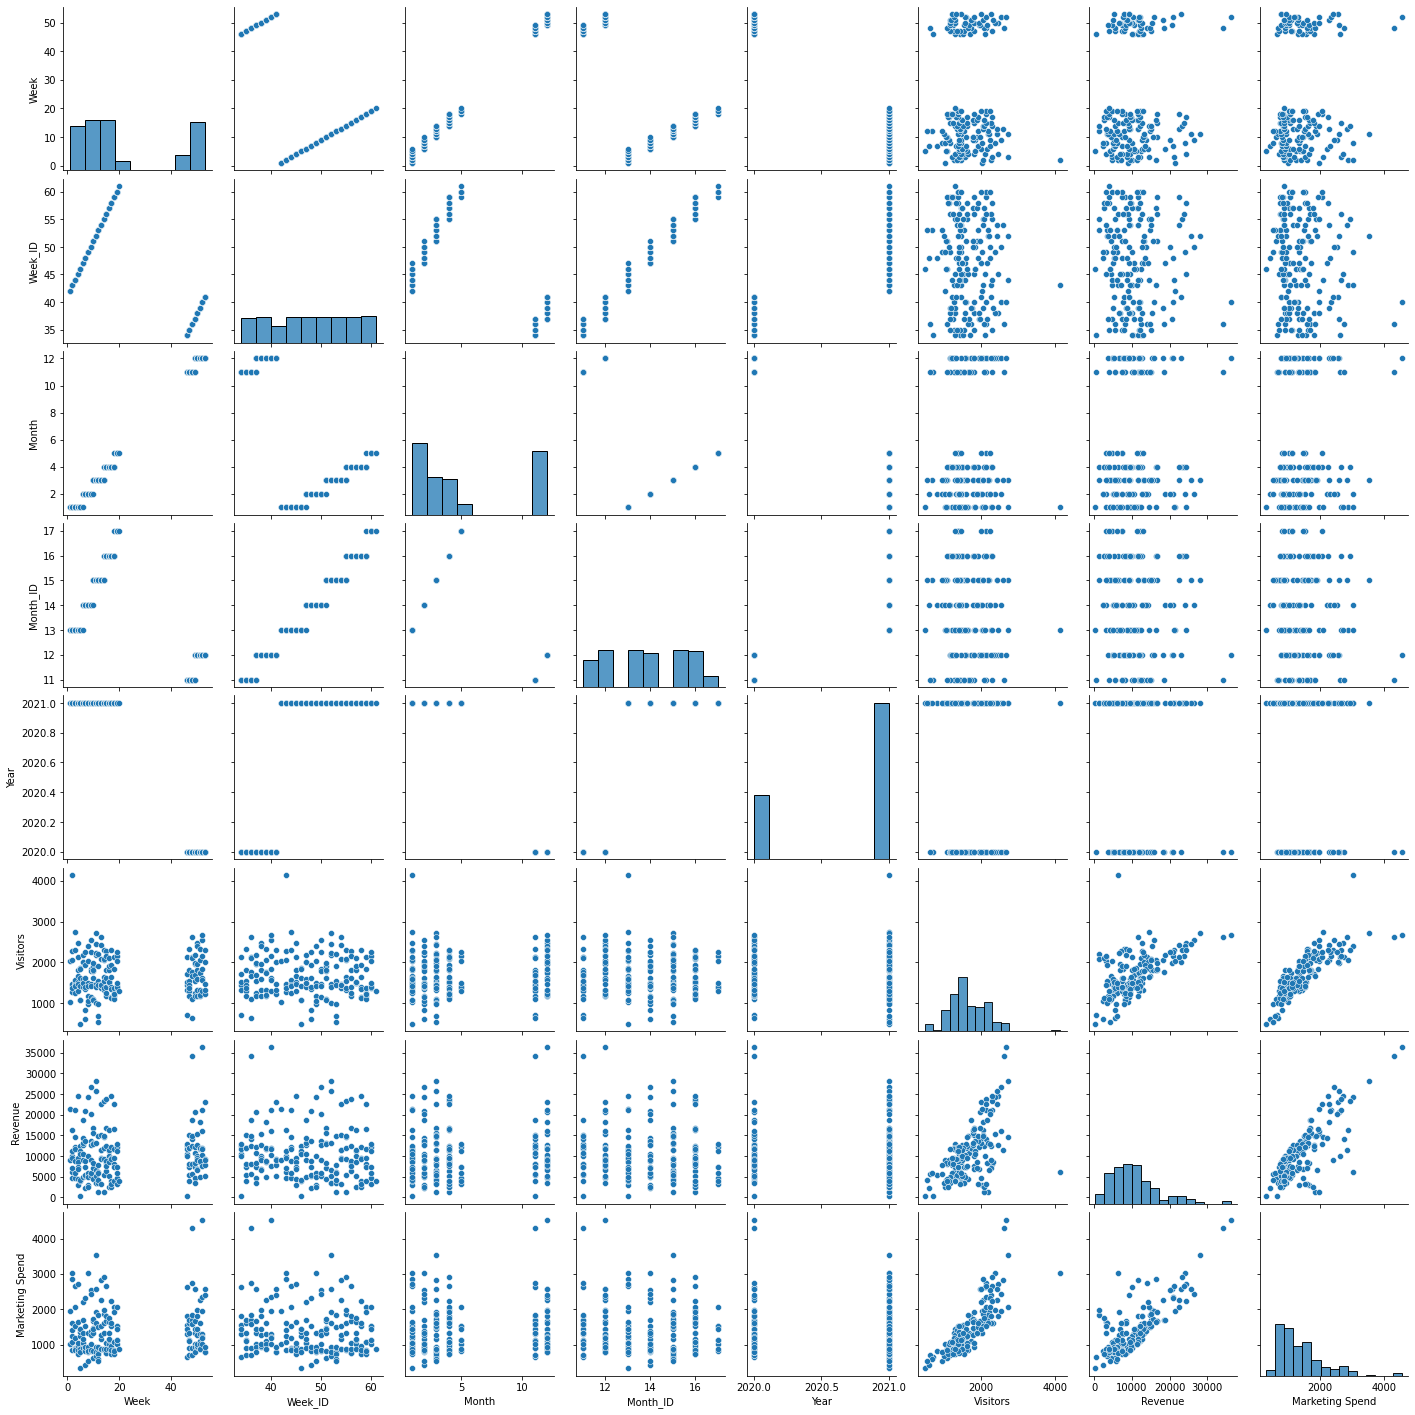

In [ ]:
sns.pairplot(dataset)
# Pairplot tchoufli correlation mabin chaque 2 variables
# Ken il zouz yatl3ou m3a b3athom wala yahbtou m3a b3athhom rahou fama correlation --> BEHI
# ken dekhla b3athha alors famech corelation

# Visitors & Marketing Spend houma li correliw m3a Revenue

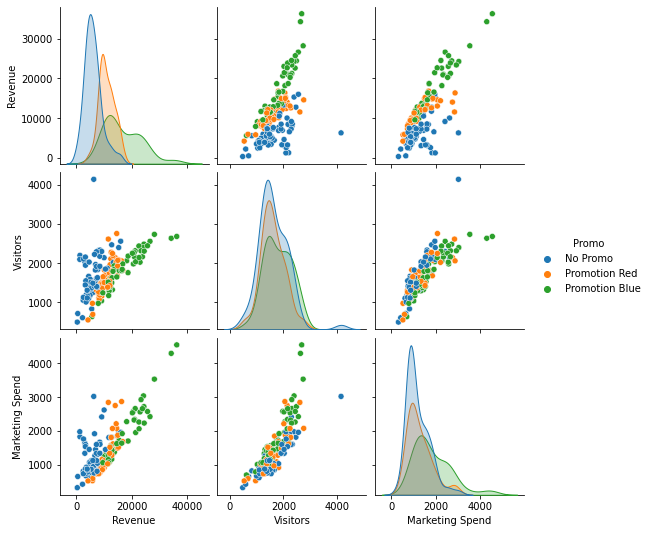

In [ ]:
sns.pairplot(dataset[['Revenue', 'Visitors','Marketing Spend', 'Promo']], hue="Promo")
# Promo is an important feature

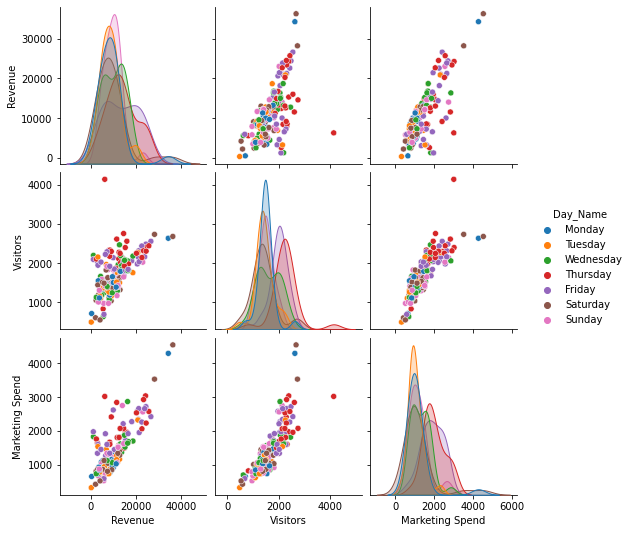

In [ ]:
sns.pairplot(dataset[['Revenue', 'Visitors','Marketing Spend', 'Day_Name']], hue="Day_Name")
# Day_name is not an important feature

### Data Preparation

In [ ]:
features = dataset[['Marketing Spend', 'Visitors', 'Promo']]
labels = dataset['Revenue']

#### Categorical Encoding

In [ ]:
# Categorical Encoding
# Method 1: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features['Promo'] = le.fit_transform(features['Promo'])

In [ ]:
# Categorical Encoding
# Method 2: One Hot Encoding
# Technique 1: using sklearn (multiple lines --> more chance for error)
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
# for loop for each column
#encoded_promo = ohe.fit_transform(features['Promo'])
# nzid encoded_promo to features
# nfasakh il original column

# Technique 2: using pandas (1 line)
features = pd.get_dummies(features, columns=['Promo'])

#### Data Scaling

In [ ]:
# Method 2: Normalisation, (entre 0 et 1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
features[['Marketing Spend','Visitors']] = mms.fit_transform(features[['Marketing Spend','Visitors']])
labels = mms.fit_transform(dataset[['Revenue']])

In [ ]:
# Method 1: Standardisation (valeurs asghir mais b nafs distribution)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features[['Marketing Spend','Visitors']] = ss.fit_transform(features[['Marketing Spend','Visitors']])

#### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

### ML training

In [ ]:
# Machine Learning
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Evaluation

In [ ]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8193549260274673
0.8407648717594951


**Benchmark** 
* Experiment:     Train_score  - Test_score

1. **Label Encoding mta3 Promo:** 0.737  - 0.668
2. **One Hot Encoding  mta3 Promo:** 0.83 - 0.768
3. **OhE + features stand:** 0.83 - 0.768
4. **Ohe + features norm:** 0.830 - 0.768
5. **Ohe + features norm + labels norm:** 0.830 - 0.768


